In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [5]:
df = pd.read_csv("D:\\HK2 (NĂM 3)\\OLAP\\PROJECT\\DATA\\global_superstore_2016.csv", encoding='latin1')

In [6]:
# view dimensions of dataset
df.shape

(51290, 24)

In [7]:
# let's preview the dataset

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [8]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [23]:

# remove leading spaces from column names

df.columns = df.columns.str.replace(' ','')

In [24]:
# view column names again

df.columns

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'PostalCode', 'City', 'State', 'Country',
       'Region', 'Market', 'ProductID', 'Category', 'Sub-Category',
       'ProductName', 'Sales', 'Quantity', 'Discount', 'Profit',
       'ShippingCost', 'OrderPriority'],
      dtype='object')

In [25]:

df['Category'].value_counts()/np.float(len(df))

Office Supplies    0.610041
Technology         0.197719
Furniture          0.192240
Name: Category, dtype: float64

In [26]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          51290 non-null  int64  
 1   OrderID        51290 non-null  object 
 2   OrderDate      51290 non-null  object 
 3   ShipDate       51290 non-null  object 
 4   ShipMode       51290 non-null  object 
 5   CustomerID     51290 non-null  object 
 6   CustomerName   51290 non-null  object 
 7   Segment        51290 non-null  object 
 8   PostalCode     9994 non-null   float64
 9   City           51290 non-null  object 
 10  State          51290 non-null  object 
 11  Country        51290 non-null  object 
 12  Region         51290 non-null  object 
 13  Market         51290 non-null  object 
 14  ProductID      51290 non-null  object 
 15  Category       51290 non-null  object 
 16  Sub-Category   51290 non-null  object 
 17  ProductName    51290 non-null  object 
 18  Sales 

In [27]:
# check for missing values in variables

df.isnull().sum()

RowID                0
OrderID              0
OrderDate            0
ShipDate             0
ShipMode             0
CustomerID           0
CustomerName         0
Segment              0
PostalCode       41296
City                 0
State                0
Country              0
Region               0
Market               0
ProductID            0
Category             0
Sub-Category         0
ProductName          0
Sales                0
Quantity             0
Discount             0
Profit               0
ShippingCost         0
OrderPriority        0
dtype: int64

In [32]:
round(df.describe())

,RowID,PostalCode,Sales,Quantity,Discount,Profit,ShippingCost
count,51290.0,9994.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,25646.0,55190.0,246.0,3.0,0.0,29.0,26.0
std,14806.0,32064.0,488.0,2.0,0.0,174.0,57.0
min,1.0,1040.0,0.0,1.0,0.0,-6600.0,1.0
25%,12823.0,23223.0,31.0,2.0,0.0,0.0,3.0
50%,25646.0,56430.0,85.0,3.0,0.0,9.0,8.0
75%,38468.0,90008.0,251.0,5.0,0.0,37.0,24.0
max,51290.0,99301.0,22638.0,14.0,1.0,8400.0,934.0


Text(0, 0.5, 'Profit')

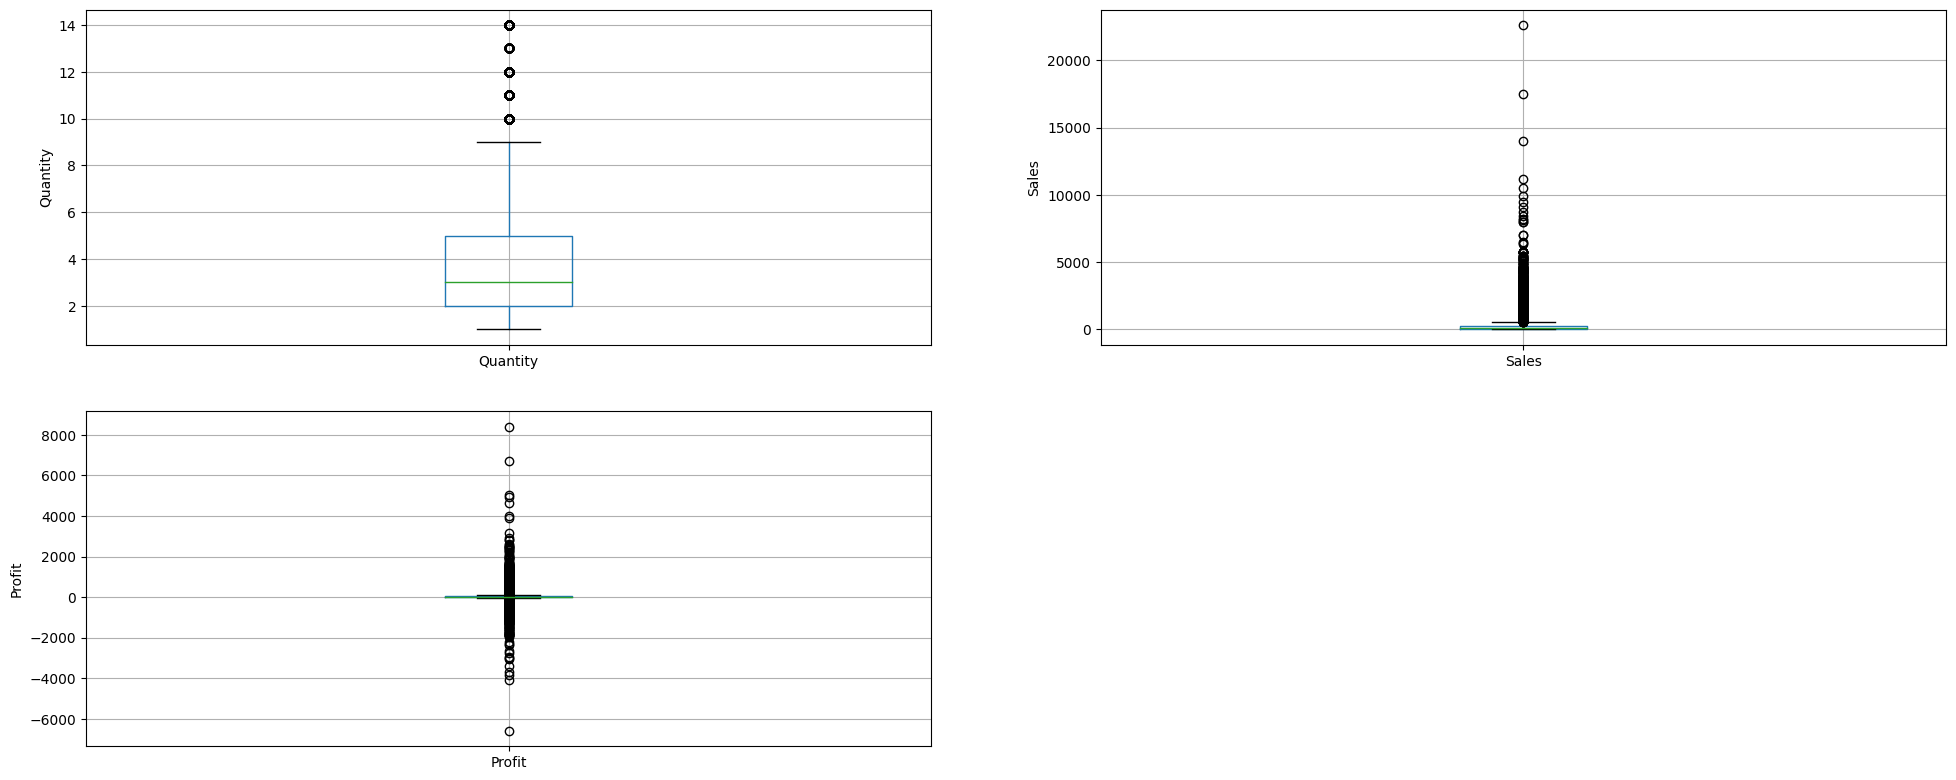

In [35]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='')
fig.set_title('')
fig.set_ylabel('Quantity')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='Sales')
fig.set_title('')
fig.set_ylabel('Sales')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='Profit')
fig.set_title('')
fig.set_ylabel('Profit')



Text(0, 0.5, 'Number of ')

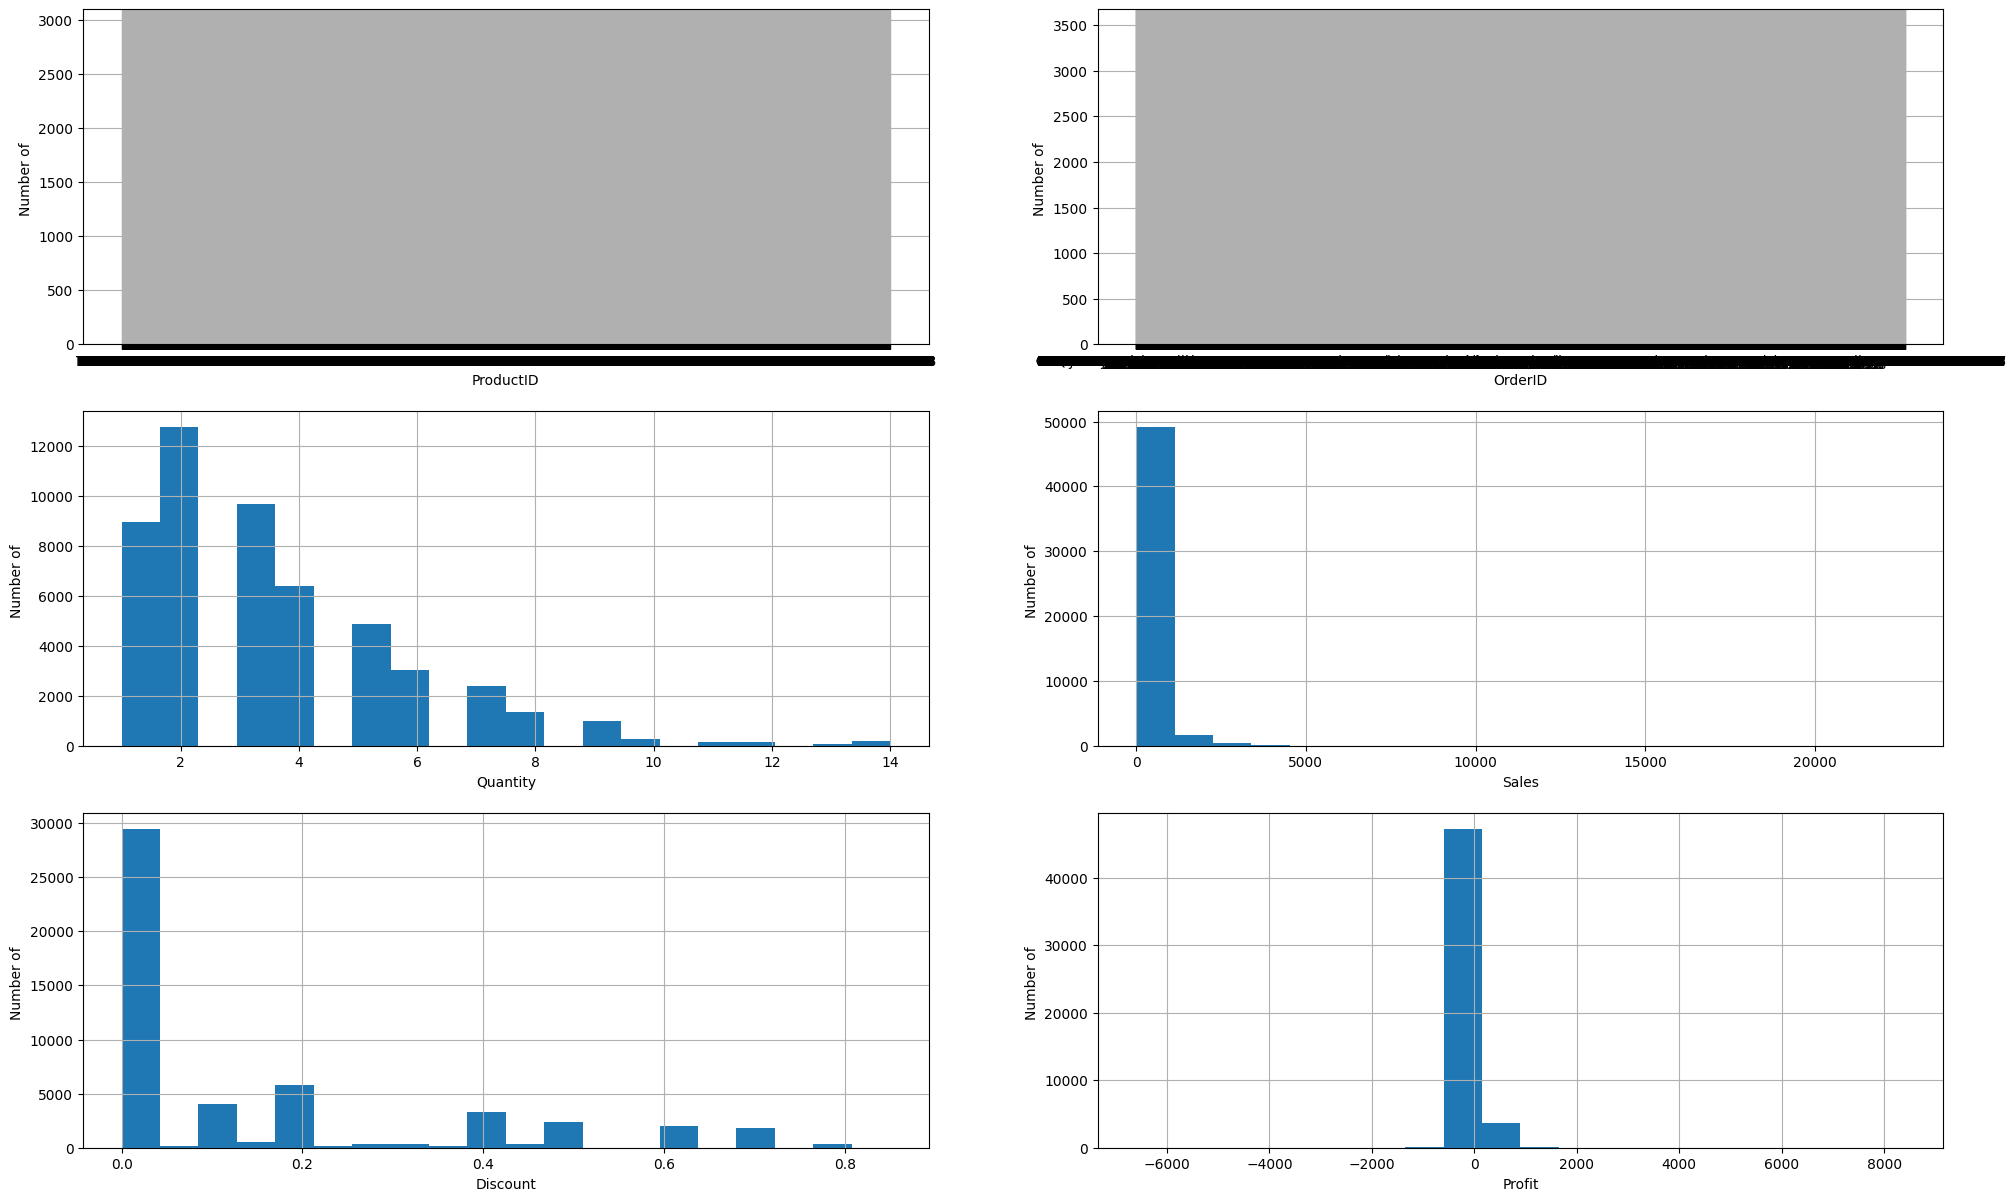

In [37]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))

plt.subplot(4, 2, 3)
fig = df['Quantity'].hist(bins=20)
fig.set_xlabel('Quantity')
fig.set_ylabel('Number of ')

plt.subplot(4, 2, 4)
fig = df['Sales'].hist(bins=20)
fig.set_xlabel('Sales')
fig.set_ylabel('Number of ')

plt.subplot(4, 2, 5)
fig = df['Discount'].hist(bins=20)
fig.set_xlabel('Discount')
fig.set_ylabel('Number of ')


plt.subplot(4, 2, 6)
fig = df['Profit'].hist(bins=20)
fig.set_xlabel('Profit')
fig.set_ylabel('Number of ')



In [ ]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']